<font color=blue><font size=5>22019207065 张泽远 20200922 Python计算第4-5章及作业</font></font>

<font color=black><font size=4>Chapter4 Plotting and Visualization</font></font>

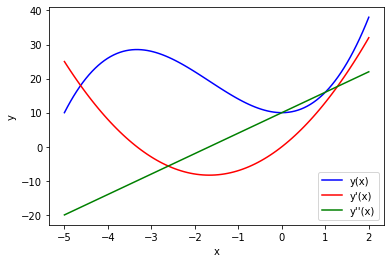

In [5]:
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
import sympy
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10
fig, ax = plt.subplots()

ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

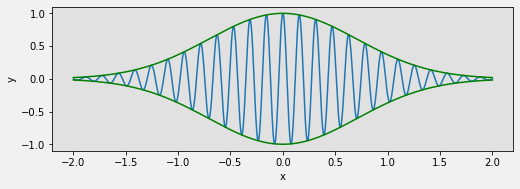

In [3]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)
ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")

ValueError: '*' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

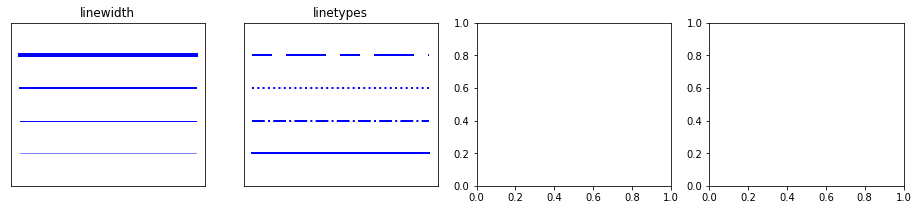

In [8]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
fig, axes = plt.subplots(1, 4, figsize=(16,3))

linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    axes[2].plot(x, y + n, color="blue", lw=2, ls='*',marker=marker)
    axes_settings(fig, axes[2], "markers", len(markers))

    markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-',marker='o', markersize=markersize,markerfacecolor=markerfacecolor, markeredgewidth=2)
    axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

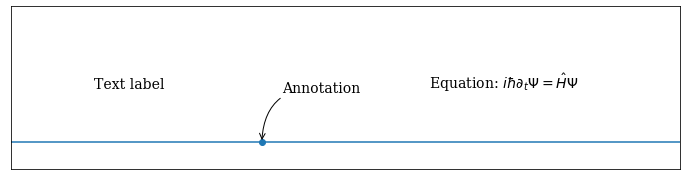

In [30]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

ax.plot(1, 0, 'o')
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords='data',
            xytext=(+20, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$", fontsize=14, family="serif")

fig.savefig("ch4-text-annotation.pdf")

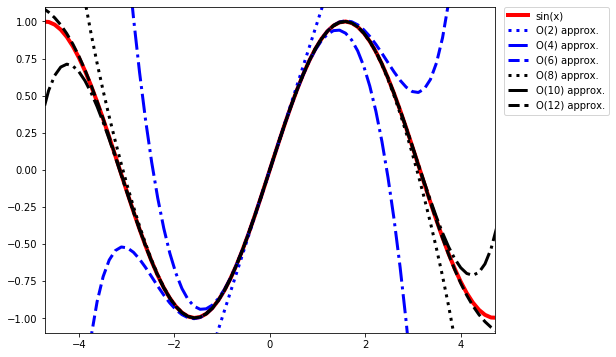

In [10]:
import sympy as s
import numpy as np
sym_x = s.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    return s.lambdify(sym_x, s.sin(sym_x).series(n=n+1).removeO(), 'numpy')(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, np.sin(x), linewidth=4, color="red", label='sin(x)')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
            linestyle=linestyles[idx % 3], linewidth=3,
            label="O(%d) approx." % (n+1))
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
fig.subplots_adjust(right=.75);

Text(0.5, 1.0, "axis('equal')")

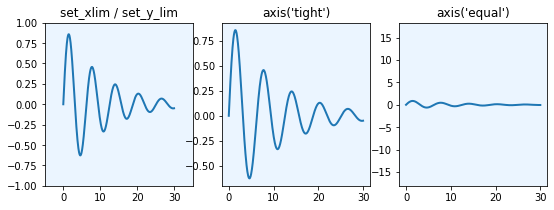

In [20]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)
fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})
axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

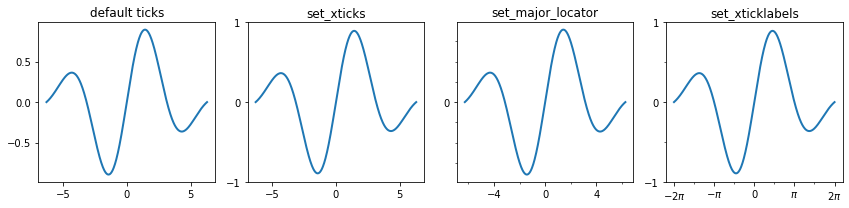

In [21]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'])
axes[3].xaxis.set_minor_locator(mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

fig.tight_layout()
fig.savefig("ch4-axis-ticks.pdf")

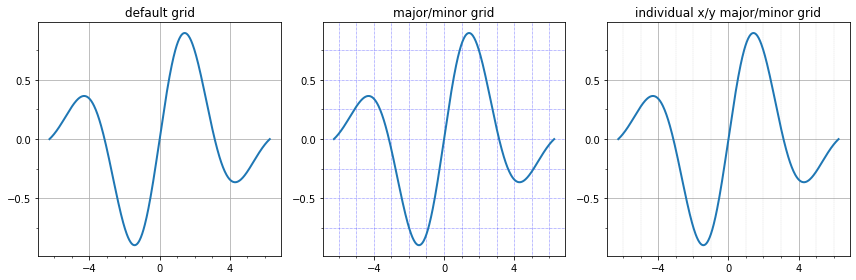

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()
fig.savefig("ch4-axis-grid.pdf")

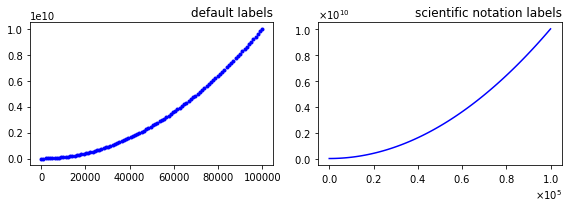

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

fig.tight_layout()
fig.savefig("ch4-axis-scientific.pdf")

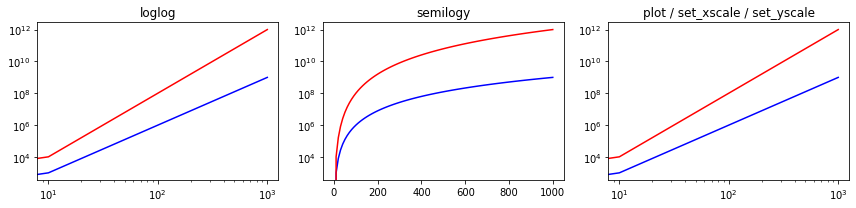

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

fig.tight_layout()
fig.savefig("ch4-axis-log-plots.pdf")

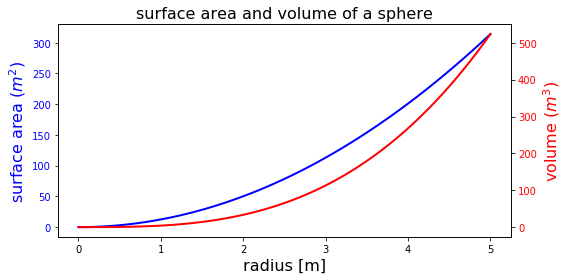

In [25]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
fig.tight_layout()
fig.savefig("ch4-axis-twin-ax.pdf")

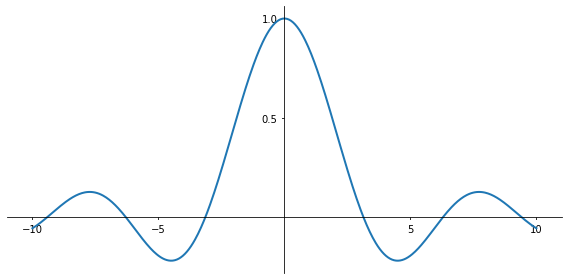

In [26]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
    
ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white',
                    'edgecolor': 'white'})
    
fig.tight_layout()
fig.savefig("ch4-axis-spines.pdf")

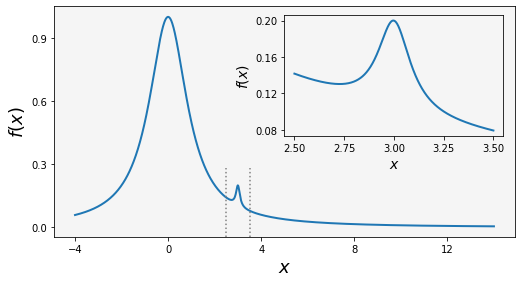

In [29]:
fig = plt.figure(figsize=(8, 4))
def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)
def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")
ax_insert = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax_insert, x, f, 14)

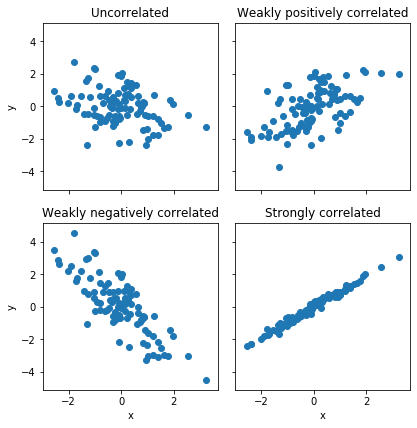

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)

fig.savefig("ch4-advanced-axes-subplots.pdf")

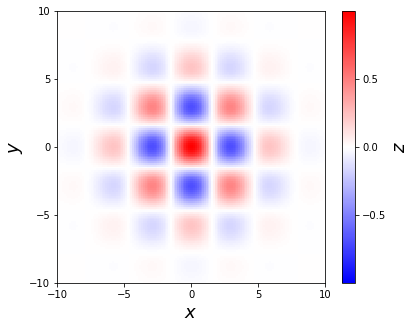

In [33]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

p = ax.pcolor(X, Y, Z, vmin=-abs(Z).max(), vmax=abs(Z).max(), cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])

fig.savefig("ch4-colormap-pcolor.pdf")

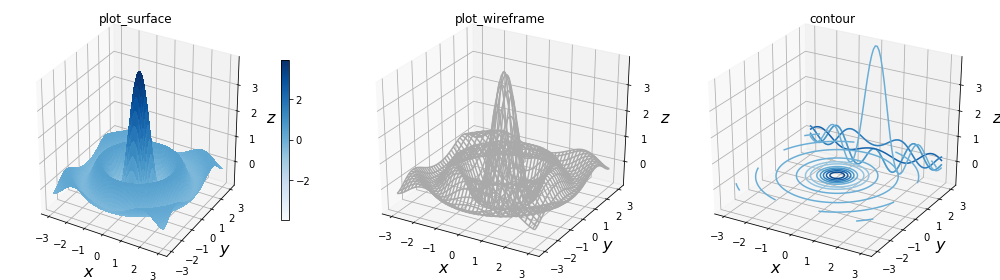

In [34]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")

fig.tight_layout()
fig.savefig("ch4-3d-plots.png", dpi=200)

<font color=black><font size=4>Chapter5 Equation Solving</font></font>

In [38]:
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-38-b652d31fc8cd>, line 8)

In [39]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A.rank()


2

In [40]:
A.condition_number()

sqrt(2*sqrt(170) + 27)/sqrt(27 - 2*sqrt(170))

In [41]:
sympy.N(_)

7.58240137440151

In [42]:
A.norm()


3*sqrt(6)

In [43]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
np.linalg.matrix_rank(A)

2

In [44]:
np.linalg.cond(A)

7.582401374401514

In [45]:
np.linalg.norm(A)

7.3484692283495345

In [46]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
L, U, _ = A.LUdecomposition()
L

Matrix([
[  1, 0],
[5/2, 1]])

In [47]:
U

Matrix([
[2,    3],
[0, -7/2]])

In [48]:
L*U

Matrix([
[2, 3],
[5, 4]])

In [49]:
x = A.solve(b); x # equivalent to A.LUsolve(b)

Matrix([
[-1],
[ 2]])

In [54]:
from scipy import linalg as la
from scipy import optimize
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P,L,U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [55]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [56]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [57]:
la.solve(A, b)

array([-1.,  2.])

In [58]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
sympy.simplify(A.solve(b))


Matrix([
[(2*p - 1)/(p - 1)],
[ -sqrt(p)/(p - 1)]])

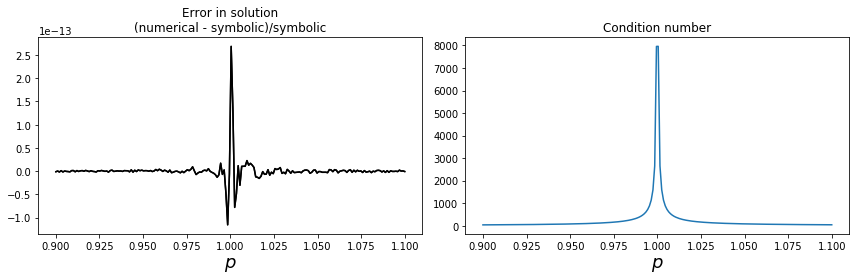

In [59]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])


x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()


AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)


p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

fig.tight_layout()
fig.savefig('ch5-linear-systems-condition-number.pdf')

In [61]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])

sympy.solve(A*x - b, x_vars)

{x_2: 20/3 - 2*x_3, x_1: x_3 - 19/3}

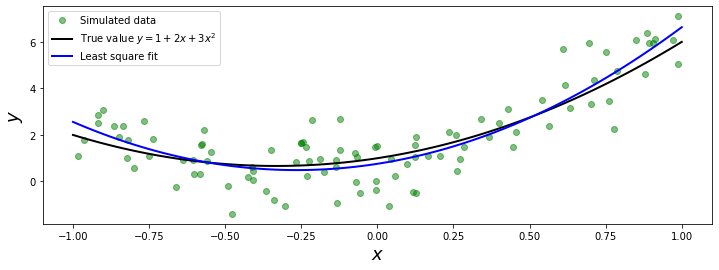

In [62]:
np.random.seed(1234)


x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2


m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)


A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square.pdf')

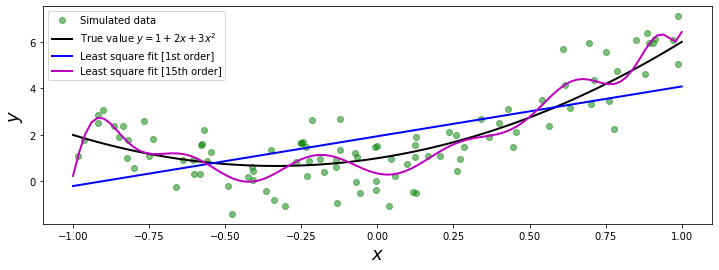

In [63]:
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])


A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2);

fig.savefig('ch5-linear-systems-least-square-2.pdf')

In [68]:
eps, delta = sympy.symbols("epsilon, delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

Matrix([
[epsilon,    delta],
[  delta, -epsilon]])

In [69]:
 H.eigenvals()

{-sqrt(delta**2 + epsilon**2): 1, sqrt(delta**2 + epsilon**2): 1}

In [70]:
H.eigenvects()


[(-sqrt(delta**2 + epsilon**2), 1, [Matrix([
   [-delta/(epsilon + sqrt(delta**2 + epsilon**2))],
   [                                             1]])]),
 (sqrt(delta**2 + epsilon**2), 1, [Matrix([
   [-delta/(epsilon - sqrt(delta**2 + epsilon**2))],
   [                                             1]])])]

In [71]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T * evec2[0])

Matrix([[0]])

In [72]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
evals, evecs = la.eig(A)
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [73]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [74]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

In [75]:
x, a, b, c = sympy.symbols("x, a, b, c")
sympy.solve(a + b*x + c*x**2, x)

[(-b + sqrt(-4*a*c + b**2))/(2*c), -(b + sqrt(-4*a*c + b**2))/(2*c)]

In [76]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)


[-2*atan((b - sqrt(a**2 + b**2))/a), -2*atan((b + sqrt(a**2 + b**2))/a)]

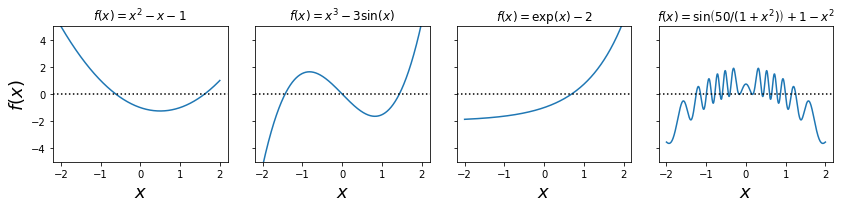

In [79]:
x = np.linspace(-2, 2, 1000)


f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)
    
fig.tight_layout()
fig.savefig('ch5-nonlinear-plot-equations.pdf')

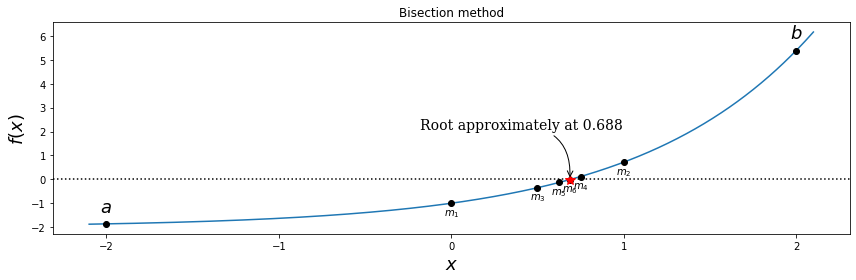

In [80]:
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")

fig.tight_layout()
fig.savefig('ch5-nonlinear-bisection.pdf')

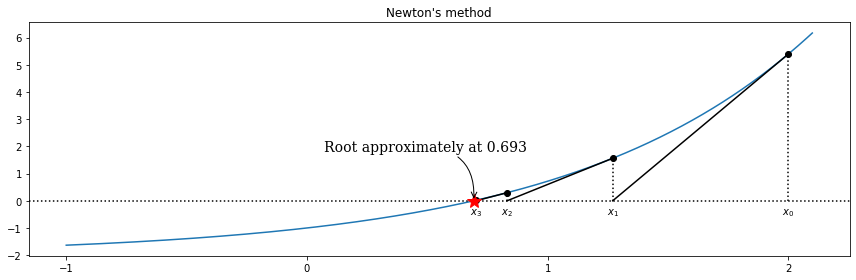

In [81]:
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([-1, 0, 1, 2])
fig.tight_layout()
fig.savefig('ch5-nonlinear-newton.pdf')

In [82]:
 optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

0.6931471805601177

In [84]:
x_root_guess = 2
f= lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)
optimize.newton(f, x_root_guess)

0.6931471805599455

In [85]:
optimize.newton(f, x_root_guess, fprime=fprime)

0.6931471805599453

In [86]:
 optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

0.6931471805599453

In [87]:
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

0.6931471805599381

In [88]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]
optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [89]:
x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

Matrix([
[-3*x**2 - 4*x, 1],
[          2*x, 1]])

In [92]:
def f_jacobian(x):
        return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

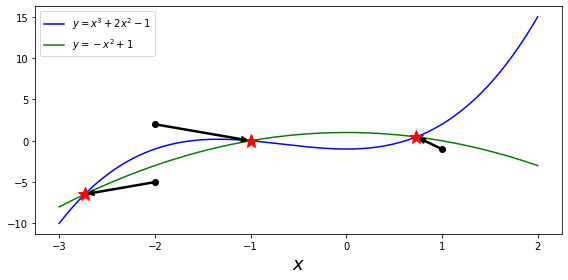

In [93]:
x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)

    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()
fig.savefig('ch5-nonlinear-system.pdf')

G:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


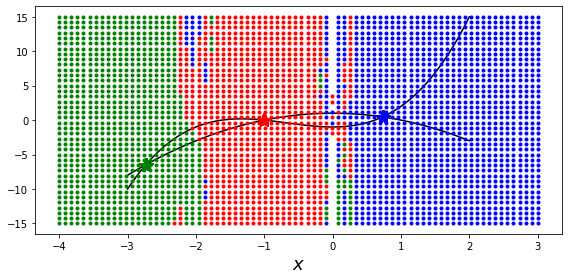

In [94]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,
            x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
    
ax.set_xlabel(r'$x$', fontsize=18)
fig.tight_layout()
fig.savefig('ch5-nonlinear-system-map.pdf')

<font color=black><font size=4>作业1</font></font>

In [9]:
import pandas as pd
import numpy as np
data=pd.read_csv('WorldIndex.csv')

Text(0.5, 1.0, 'Life Histogram')

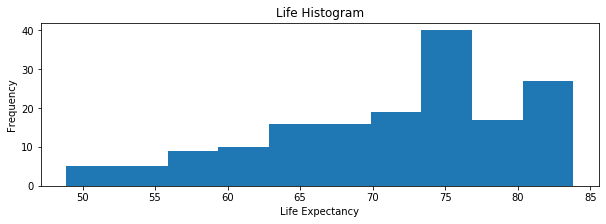

In [11]:
new_data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
import matplotlib.pyplot as plt
lifeData = new_data["Life_expectancy"]

fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.hist(lifeData) 
ax.set_ylabel("Frequency")
ax.set_xlabel("Life Expectancy")
ax.set_title("Life Histogram")

Text(0.5, 0, 'GDP')

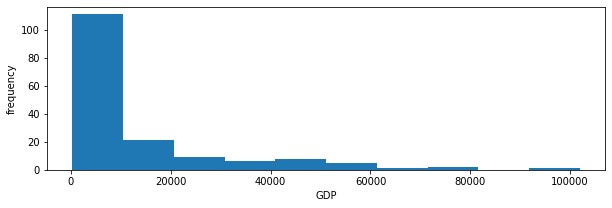

In [12]:
gdpData = new_data["GDP_per_capita"]
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.hist(gdpData) 
ax.set_ylabel("frequency")
ax.set_xlabel("GDP")

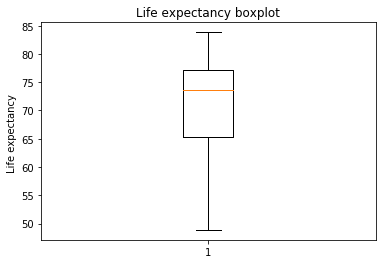

In [13]:
plt.boxplot(x=new_data.Life_expectancy)
plt.ylabel("Life expectancy ")
plt.title("Life expectancy boxplot")
plt.show()

In [14]:
datasetCountry = new_data["Continent"]
list1 = datasetCountry.values.tolist()
continent = dict(zip(*np.unique(list1, return_counts=True)))
continent

{'Africa': 48,
 'Asia': 36,
 'Europe': 41,
 'North America': 19,
 'Oceania': 9,
 'South America': 11}

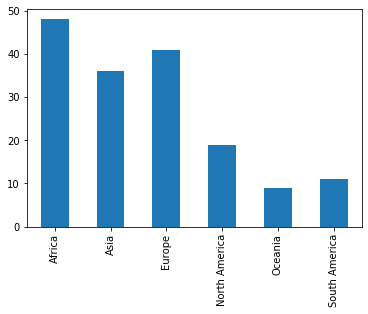

In [15]:
continent = pd.Series(continent)
continent.plot(kind='bar')

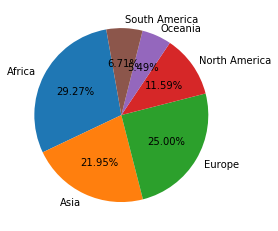

In [16]:
plt.pie(continent,labels=continent.index,autopct='%.2f%%',shadow=False,startangle=100)
plt.show()

Text(0.5, 1.0, 'scatter diagram')

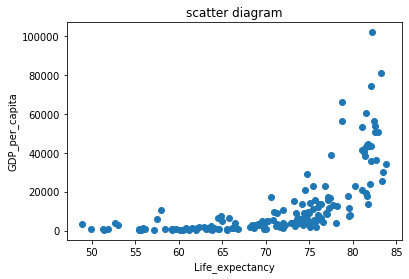

In [17]:
plt.scatter(x=new_data.Life_expectancy,y=new_data.GDP_per_capita)
plt.xlabel('Life_expectancy')
plt.ylabel('GDP_per_capita')
plt.title('scatter diagram')

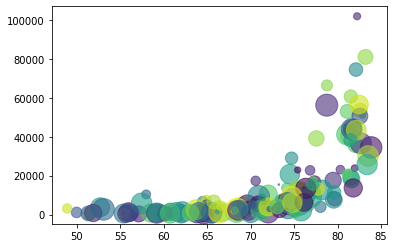

In [18]:
size=new_data['Population'].rank()
n=3
colors = np.random.rand(len(new_data.Country)) 
plt.scatter(x=new_data.Life_expectancy,y=new_data.GDP_per_capita,s=size*n,alpha=0.6,c=colors)
plt.show()

<font color=black><font size=4>作业2</font></font>

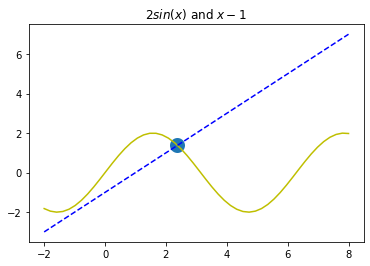

In [19]:
from scipy.integrate import odeint
from scipy.optimize import root,fsolve
x1 = np.linspace(-2,8)
y1_1,y1_2 = 2*np.sin(x1),x1-1
plt.figure(1)
plt.plot(x1,y1_1,'y',x1,y1_2,'b--')
plt.title('$2sin(x)$ and $x-1$')
def f(x):
    return np.sin(x)*2-x+1

sol1_root = root(f,[2])
sol1_fsolve = fsolve(f,[2])
plt.scatter(sol1_fsolve,2*np.sin(sol1_fsolve),linewidths=9)
plt.show()

In [20]:
from sympy import *
x1 = Symbol('x1')
x2 = Symbol('x2')
print(solve([3 * x1 + 2*x2 - 3, x1 - 2*x2 - 5],[x1, x2]))

{x1: 2, x2: -3/2}
